<a href="https://colab.research.google.com/github/nishres/streamflow_ml/blob/main/14_LSTM_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install hydroeval

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hydroeval as he
#import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import keras.backend
from google.colab import output

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_train_val_test2(basin_name):
    available_data = {
        'Babai_Chepang':[3683,5647,5654,7000,6670,7669],
        'Bagmati_Padheradovan':[3683,7200,7201,8945,8949,9731],
        'Balephi_Jalbire':[3683,7200,7201,8745,8746,9465],
        'Bhotekoshi_Barabise':[5310,6633,7670,8400,6726,6939],
        'Budhigandaki_Arughat':[3683,5647,5654,7000,4658,5647],
        'Budhiganga_Chitra':[3823,5650,5651,6251,6252,6939],
        'Chamelia_Nayalbadi':[3683,5647,5654,7000,8746,9465],
        'Dudhkoshi_Rabuwabazar':[3683,5647,5654,7000,8355,9130],
        'Indrawati_Dolalghat':[5844,7029,7670,8270,8271,8765],
        'Kaligandaki_Anshing':[3683,5647,5654,7000,8746,9465],
        'Likhu_Sangutar':[6193,7198,5479,6102,4748,5112],
        'Madi_Shisaghat':[3755,7300,7301,8800,8801,9753],
        'Marikhola_Nayagaon':[3683,5647,5654,7000,8801,9465],
        'Marsyangdi_Bhakundebesi':[3683,4883,5326,6208,4884,5316],
        'Modikhola_Nayapul':[5338,8795,3652,5329,8796,9465],
        'Myagdikhola_Mangalghat':[6991,9465,3712,4887,6018,6498],
        'Rapti_Bagasotigaon':[3683,5647,5654,7000,8046,8936],
        'Rapti_Jalkundi':[3683,5647,5654,7000,8801,9465],
        'Rapti_Kusum':[4748,7600,7601,9145,9146,10122],
        'Sabhyakhola_Tumlingtar':[7670,9495,6209,7624,5098,6192],
        'Saradakhola_Daradhunga':[3652,6939,7670,8970,8971,9861],
        'Seti_Bangga':[7213,9465,3987,6604,6695,7183],
        'Seti_Gopaghat':[3683,5647,5654,7000,8746,9131],
        'Setigandaki_Damauli':[3683,5647,5654,7000,8801,9465],
        'Sinjhakhola_Diware':[3652,7200,7201,8745,8746,9465],
        'Sunkoshi_Khurkot':[5113,6458,8766,9495,6459,7258],
        'Sunkoshi_Pachwarghat':[3683,5647,5654,7000,8933,9465],
        'Tadi_Belkot':[4337,7500,7501,9495,3652,4309],
        'Tamakoshi_Busti':[5113,6939,7670,8400,8766,9465],
        'Tamor_Majhitar':[3683,5647,6677,8023,6209,6644],
        'Tamor_Mulghat':[4868,7000,7001,8765,4183,4747],
        'Thulibheri_Rimna':[3683,5647,5654,7000,9182,9465],
        'Tilanadi_Nagma':[3683,5647,5654,7000,6401,7945],
        'Trishuli_Betrawati':[3683,5647,5654,7000,8746,9465],

    }
    for key in available_data.keys():
        if key in basin_name:
            train_s = available_data[key][0]
            train_e = available_data[key][1]
            val_s = available_data[key][2]
            val_e = available_data[key][3]
            test_s = available_data[key][4]
            test_e = available_data[key][5]
    #print(basin_name,train_s,train_e,val_s, val_e, test_s, test_e)
    return train_s, train_e, val_s, val_e, test_s, test_e

In [ ]:

n_days = [1]
#n_days = [ 1, 3, 5, 7, 10 ]                        # number of preceeding days
drop_rate = [0.1]
#drop_rate = [ 0.2, 0.100, 0.010, 0.001 ]         # dropout rate 0.050,
#cell_layers = [ 50]
l_rate = 0.001                                            # learning rate
cells = [ 50 ]

In [ ]:
in_path = '/content/drive/MyDrive/2_2/00_Raw'
train_path = '/content/drive/MyDrive/2_2/00_Raw_AggTrain'
all_files = os.listdir(in_path)
for i in range(len(all_files)):
  print(i,all_files[i])
print('---------------------------------')
all_train_files = os.listdir(train_path)
for i in range(len(all_train_files)):
  print(i,all_train_files[i])

0 Babai_Chepang_basin_avg.csv
1 Budhiganga_Chitra_basin_avg.csv
2 Chamelia_Nayalbadi_basin_avg.csv
3 Dudhkoshi_Rabuwabazar_basin_avg.csv
4 Marikhola_Nayagaon_basin_avg.csv
5 Kaligandaki_Anshing_basin_avg.csv
6 Myagdikhola_Mangalghat_basin_avg.csv
7 Rapti_Jalkundi_basin_avg.csv
8 Rapti_Bagasotigaon_basin_avg.csv
9 Seti_Bangga_basin_avg.csv
10 Seti_Gopaghat_basin_avg.csv
11 Setigandaki_Damauli_basin_avg.csv
12 Sunkoshi_Khurkot_basin_avg.csv
13 Sunkoshi_Pachwarghat_basin_avg.csv
14 Tamakoshi_Busti_basin_avg.csv
15 Tamor_Mulghat_basin_avg.csv
16 Tamor_Majhitar_basin_avg.csv
17 Thulibheri_Rimna_basin_avg.csv
18 Tilanadi_Nagma_basin_avg.csv
19 Trishuli_Betrawati_basin_avg.csv
20 Budhigandaki_Arughat_basin_avg.csv
---------------------------------
0 Babai_Chepang_basin_avg.csv
1 Chamelia_Nayalbadi_basin_avg.csv
2 Dudhkoshi_Rabuwabazar_basin_avg.csv
3 Marikhola_Nayagaon_basin_avg.csv
4 Kaligandaki_Anshing_basin_avg.csv
5 Rapti_Jalkundi_basin_avg.csv
6 Rapti_Bagasotigaon_basin_avg.csv
7 Seti_Go

In [ ]:
def get_data(b_name,train_path1):
    all_tr_files = os.listdir(train_path1)
    train_list = []
    val_list = []
    for file in all_tr_files:
        if file == b_name:
            continue
        r_df = pd.read_csv(os.path.join(train_path1,file))
        r_df['Basin'] = file[:-14]
        r_df = r_df[['t2m_mean','src_mean','snowc_mean','tp_sum','ssro_sum','e_sum','sf_sum','area','slope_mean','elv_mean','sand',	'clay',	'silt', 'Observed']] #,'sand',	'clay',	'silt',	'ndvi'
        train_start, train_end, val_start, val_end, test_start, test_end = get_train_val_test2(file)
        #print(train_start, train_end, val_start, val_end, test_start, test_end)
        temp_tr = r_df[train_start:train_end]
        temp_vl = r_df[val_start:val_end]
        train_list.append(temp_tr)
        val_list.append(temp_vl)
    df_tr = pd.concat(train_list)
    df_vl = pd.concat(val_list)
    #a = int(input('Check:'))
    return df_tr, df_vl

In [ ]:
def normalize(udf):
    #scaler = MinMaxScaler()
    scaler = StandardScaler()
    udf = udf[[c for c in udf if c not in ['time']]]
    #print(udf)
    column_transformer = ColumnTransformer(
        transformers=[
            ('scaler', scaler, ['t2m_mean', 'src_mean', 'snowc_mean', 'tp_sum','ssro_sum', 'e_sum', 'sf_sum','area','slope_mean','elv_mean','sand',	'clay',	'silt']) #,'sand',	'clay',	'silt',	'ndvi'
        ],
        remainder='passthrough'
    )

    transformed_data = column_transformer.fit_transform(udf)
    df_normalized = pd.DataFrame(transformed_data, columns=udf.columns)

    print()
    #print(df_normalized)
    return df_normalized

In [ ]:
def npfy(df,m):
    x = []
    row = []
    y = []
    df_in = df.drop(['Observed'], axis = 1 )
    df_in_np = df_in.to_numpy()
    for i in range(len(df_in)-m+1):
      for j in range(0,m):
        row = [df_in_np[i+j] for j in range(0,m)]
      x.append(row)
      y.append(df['Observed'][i+m-1])
      row  = []
    x_1 = np.array(x)
    y_1 = np.array(y)
    #print(x1.shape, y1.shape)
    return x_1, y_1

/content/drive/MyDrive/2_2/04_LSTM_R_FD2_TopoGeo/Budhigandaki_Arughat/Model/Budhigandaki_Arughat_d0.100.keras
(27496, 1, 13) (27496,) (18844, 1, 13) (18844,) (1964, 1, 13) (1964,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 50)          │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,051 (129.11 KB)

 Trainable params: 33,051 (129.11 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
855/860 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 73007.3438 - root_mean_squared_error: 266.7862
Epoch 1: val_loss improved from inf to 17971.80078, saving model to /content/drive/MyDrive/2_2/04_LSTM_R_FD2_TopoGeo/Budhigandaki_Arughat/Model/Budhigandaki_Arughat_d0.100.keras
860/860 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 72823.0938 - root_mean_squared_error: 266.4309 - val_loss: 17971.8008 - val_root_mean_squared_error: 134.0589
Epoch 2/50
847/860 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29447.9883 - root_mean_squared_error: 171.3727
Epoch 2: val_loss improved from 17971.80078 to 14553.23242, saving model to /content/drive/MyDrive/2_2/04_LSTM_R_FD2_TopoGeo/Budhigandaki_Arughat/Model/Budhigandaki_Arughat_d0.100.keras
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 29402.9688 - root_mean_squared_error: 171.2421 - val_loss: 14553.2324 - val_root_mean_squared_error: 120.6368
Epoch 3/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24515.2812 - root_mean_squared_error: 1

<ipython-input-13-3a9e97ab6274>:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_ts['Predicted'] = 'None'
<ipython-input-13-3a9e97ab6274>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_ts['Predicted'],df_out_ts['Check'] = test_results['Test Predictions'],test_results['Actuals']
<ipython-input-13-3a9e97ab6274>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

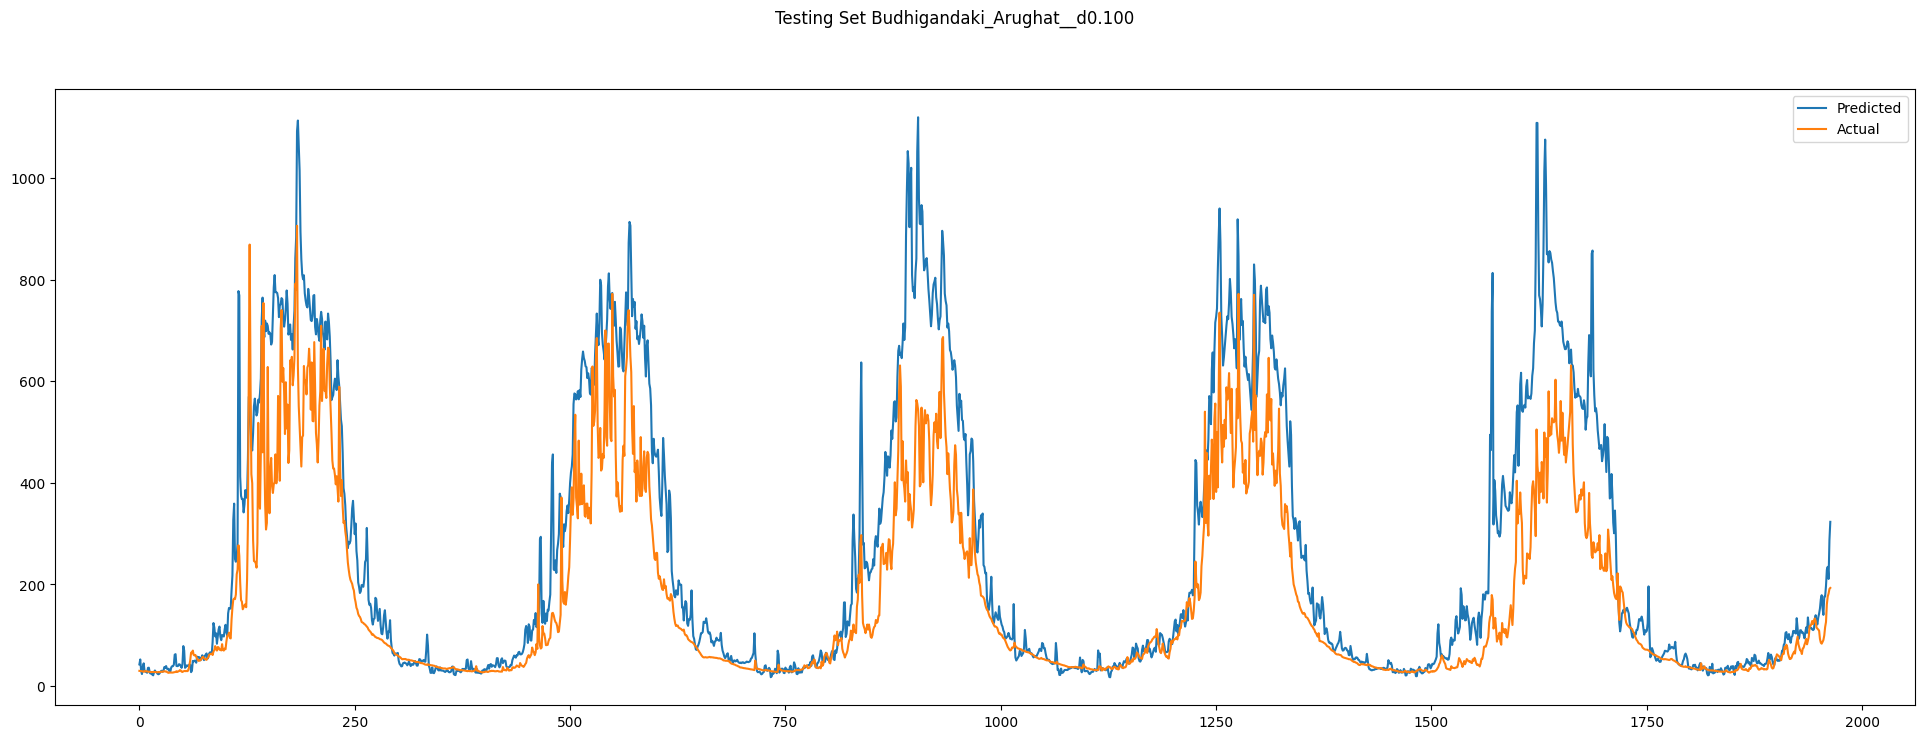

<ipython-input-13-3a9e97ab6274>:252: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


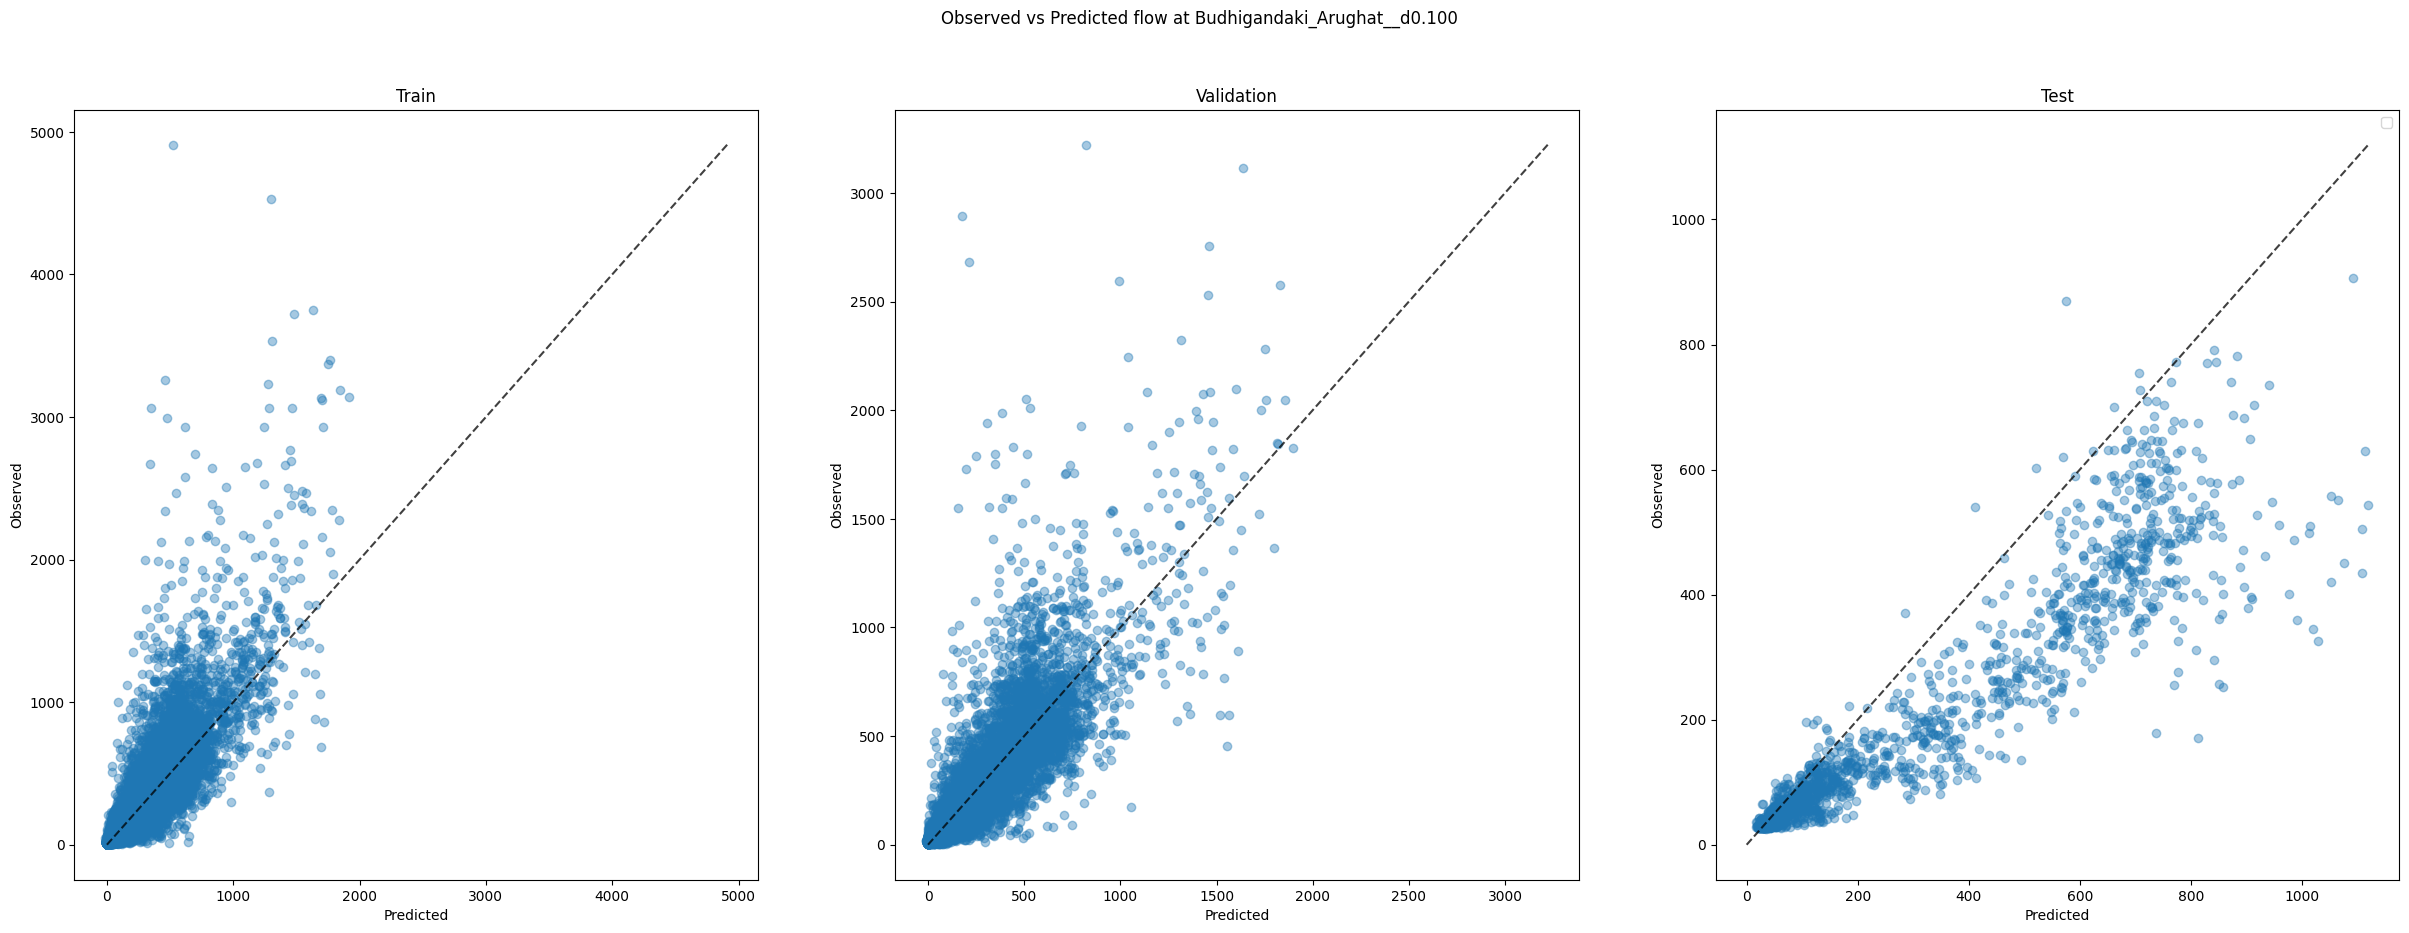

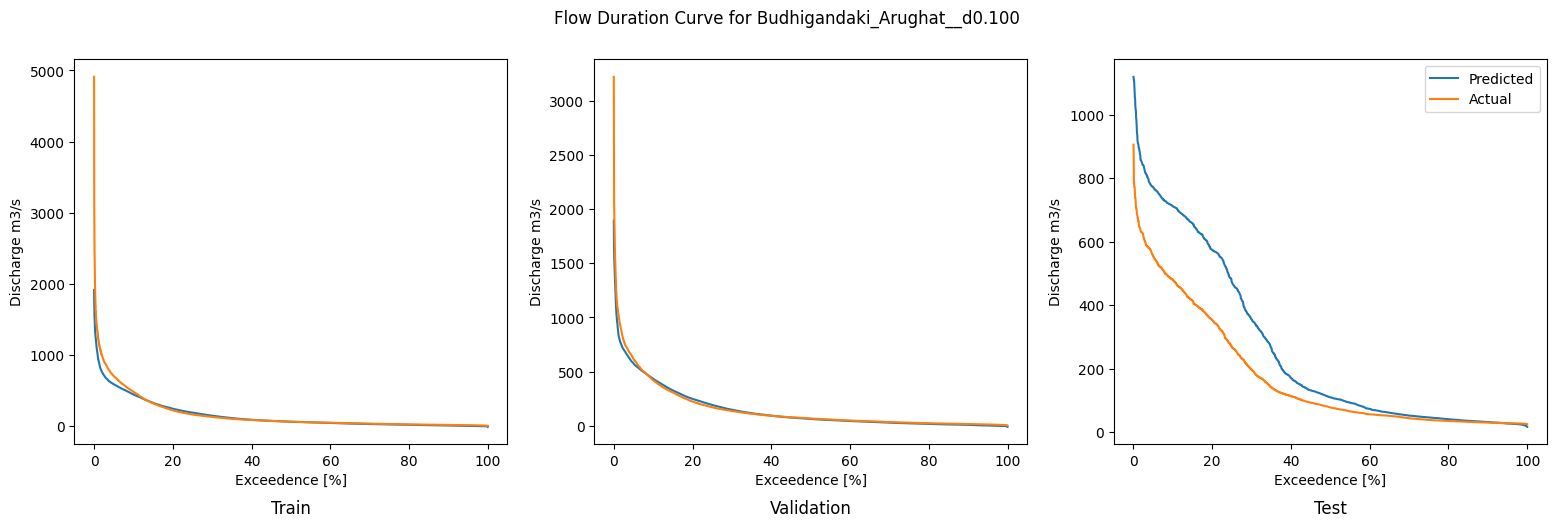

In [ ]:
for i in range(21):
    basin_name = all_files[i][:-14]                                   # Select a basin as test
    raw_df = pd.read_csv(os.path.join(in_path,all_files[i]))
    rdf_train, rdf_val = get_data(all_files[i],train_path)
    train_start, train_end, val_start, val_end, test_start, test_end = get_train_val_test2(all_files[i])

    rdf_ts = raw_df[['t2m_mean','src_mean','snowc_mean','tp_sum','ssro_sum','e_sum','sf_sum','area','slope_mean','elv_mean','sand',	'clay',	'silt','Observed']]  #,'sand',	'clay',	'silt',	'ndvi'
    rdf_ts = rdf_ts[train_start:train_end]
    raw_df = raw_df[train_start:train_end]

    len_ts = len(rdf_ts)
    #print(len_tr, len_vl, len_ts)
    all_df = pd.concat([rdf_train, rdf_val, rdf_ts])
    all_df = all_df.reset_index(drop = True)
    ndf_ts = normalize(all_df)
    rdf_ts_2 = ndf_ts[-len_ts:]
    rdf_ts_2 = rdf_ts_2.reset_index(drop = True)

    df_train = normalize(rdf_train)
    df_val = normalize(rdf_val)
    df_test = normalize(rdf_ts)

    df_test[['area','slope_mean','elv_mean','sand',	'clay',	'silt']] = rdf_ts_2[['area','slope_mean','elv_mean','sand',	'clay',	'silt']]  #,'sand',	'clay',	'silt',	'ndvi'

    # print(df_train)
    # print(df_val)
    # print(df_test)
    #print(df)
    # a = int(input('Check:'))
    del rdf_train, rdf_val, rdf_ts, rdf_ts_2, all_df, ndf_ts

    out_path = '/content/drive/MyDrive/2_2/04_LSTM_R_FD2_TopoGeo/' + basin_name
    if not os.path.exists(out_path):
      os.makedirs(out_path)

    #a = int(input('Check:'))

    out_model_path = os.path.join(out_path, 'Model')
    out_plot_path = os.path.join(out_path, 'Plot')
    out_Q_path = os.path.join(out_path, 'Predicted')
    if not os.path.exists(out_model_path):
      os.makedirs(out_model_path)
    if not os.path.exists(out_plot_path):
      os.makedirs(out_plot_path)
    if not os.path.exists(out_Q_path):
      os.makedirs(out_Q_path)

    df_summary = pd.DataFrame(columns=['Basin','Days','Dropout','Cells','NSE_tr','NSE_vl','NSE_ts','KGE_tr','KGE_vl','KGE_ts','r_tr','r_vl','r_ts','alpha_tr','alpha_vl','alpha_ts','beta_tr','beta_vl','beta_ts' ])
    loc = 0
    for n in n_days:
        for dropout in drop_rate:
            for cell in cells:
                output.clear()
                suffix =  '_d' + str(f'{dropout:.3f}') #+ '_c' + str(f'{cell:2d}') '_D' + str(f'{n:02d}') +
                out_model = os.path.join(out_model_path, basin_name + suffix + '.keras')
                print(out_model)
                ###############
                x_train, y_train = npfy(df_train,n)
                x_val, y_val = npfy(df_val,n)
                x_test, y_test = npfy(df_test,n)
                print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

                #a = int(input('Check:'))
                ###############
                #Training, validation and testing data
                # x_train, y_train = x1, y1
                # x_val, y_val = x2, y2
                # x_test, y_test = x3, y3
                # print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)
                #a = int(input('Check:'))
                ###############
                #model setup
                model = Sequential()
                model.add(LSTM(cell, activation = None, return_sequences = True, input_shape = (1,x_train.shape[2]), dropout = dropout))
                #model.add(LSTM(cell, activation = None, return_sequences = True,))
                model.add(LSTM(cell, activation = None))
                model.add(Dense(1))
                model.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = l_rate), metrics = [RootMeanSquaredError()])
                print(model.summary())

                ###############
                #Callbacks
                earlyStop = EarlyStopping(monitor='val_loss',
                    patience = 5,
                    verbose = 1,
                    mode ='min',
                    restore_best_weights = True,
                    start_from_epoch = 5,
                )
                checkpoint = ModelCheckpoint(out_model,
                    verbose = 1,
                    monitor = 'val_loss',
                    save_best_only = True,
                    mode = 'min',
                )
                # reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                #     factor = 0.2,
                #     patience = 6,
                #     verbose = 1,
                #     mode = 'min',
                #     min_delta = 0.001,
                #     cooldown = 0,
                #     min_lr = 0.001,
                # )
                ###############
                #Train model
                training = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50 , callbacks = [ checkpoint ,  earlyStop ])  #reduce_lr ,

                ###############
                #Load saved model
                model.load_weights(filepath = out_model)

                ###############
                #Make predictions
                train_predictions = model.predict(x_train).flatten()
                train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
                val_predictions = model.predict(x_val).flatten()
                val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
                test_predictions = model.predict(x_test).flatten()
                test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

                ###############
                #Save Predictions
                df_out_ts = df_test[['Observed']]
                # df_out_tr = df_train[['Observed']]
                # df_out_vl = df_val[['Observed']]
                df_out_ts['Predicted'] = 'None'
                # df_out_tr['Predicted'] = 'None'
                # df_out_tr['Check'] = 'None'
                # df_out_vl['Predicted'] = 'None'
                # df_out_vl['Check'] = 'None'
                df_out_ts['Predicted'],df_out_ts['Check'] = test_results['Test Predictions'],test_results['Actuals']
                # df_out_tr['Predicted'],df_out_tr['Check'] = train_results['Train Predictions'],train_results['Actuals']
                # df_out_vl['Predicted'],df_out_vl['Check'] = val_results['Val Predictions'],val_results['Actuals']

                df_out_ts = df_out_ts[['Observed','Check','Predicted']]
                # df_out_tr = df_out_tr[['Observed','Check','Predicted']]
                # df_out_vl = df_out_vl[['Observed','Check','Predicted']]
                #print(df_out)
                out_file = os.path.join(out_Q_path, basin_name + suffix + '_ts.csv')
                df_out_ts.to_csv(out_file)
                del df_out_ts
                # out_file = os.path.join(out_Q_path, basin_name + suffix + '_tr.csv')
                # df_out_tr.to_csv(out_file)
                # del df_out_tr
                # out_file = os.path.join(out_Q_path, basin_name + suffix + '_vl.csv')
                # df_out_vl.to_csv(out_file)
                # del df_out_vl

                ##################
                #Calculate and record statistical performance
                simulations_tr = train_results['Train Predictions']
                actuals_tr = train_results['Actuals']
                nse_tr = he.evaluator(he.nse, simulations_tr, actuals_tr)
                kge_tr, r_tr, alpha_tr, beta_tr = he.evaluator(he.kge, simulations_tr, actuals_tr)

                simulations_vl = val_results['Val Predictions']
                actuals_vl = val_results['Actuals']
                nse_vl = he.evaluator(he.nse, simulations_vl, actuals_vl)
                kge_vl, r_vl, alpha_vl, beta_vl = he.evaluator(he.kge, simulations_vl, actuals_vl)

                simulations_ts = test_results['Test Predictions']
                actuals_ts = test_results['Actuals']
                nse_ts = he.evaluator(he.nse, simulations_ts, actuals_ts)
                kge_ts, r_ts, alpha_ts, beta_ts = he.evaluator(he.kge, simulations_ts, actuals_ts)

                df_summary.loc[loc] = [basin_name,n, dropout, cell, nse_tr[0], nse_vl[0], nse_ts[0], kge_tr[0], kge_vl[0], kge_ts[0],
                                      r_tr[0], r_vl[0], r_ts[0], alpha_tr[0], alpha_vl[0], alpha_ts[0], beta_tr[0], beta_vl[0], beta_ts[0] ]
                loc += 1

                ###############
                #Hydrograph Plots
                # fig, axes = plt.subplots(1,1, figsize=(15,8))
                # fig.suptitle(f'Training Set {basin_name}_{suffix}')
                # axes.plot(train_results['Train Predictions'][:1500],label = 'Predicted')
                # axes.plot(train_results['Actuals'][:1500],label = 'Actual')
                # plt.legend()
                # plt.show()
                # out_plot = os.path.join(out_plot_path, basin_name + '_Train' + suffix + '.png' )
                # fig.savefig(out_plot)

                # fig, axes = plt.subplots(1,1, figsize=(15,8))
                # fig.suptitle(f'Validation Set {basin_name}_{suffix}')
                # axes.plot(val_results['Val Predictions'][:1000],label = 'Predicted')
                # axes.plot(val_results['Actuals'][:1000],label = 'Actual')
                # plt.legend()
                # plt.show()
                # out_plot = os.path.join(out_plot_path, basin_name + '_Val' + suffix + '.png' )
                # fig.savefig(out_plot)

                fig, axes = plt.subplots(1,1, figsize=(24,8))
                fig.suptitle(f'Testing Set {basin_name}_{suffix}')
                axes.plot(test_results['Test Predictions'],label = 'Predicted')
                axes.plot(test_results['Actuals'],label = 'Actual')
                plt.legend()
                plt.show()
                out_plot = os.path.join(out_plot_path, basin_name + '_Test' + suffix + '.png' )
                fig.savefig(out_plot)
                print()

                #Training History
                # fig, axes = plt.subplots(2,1, figsize=(14, 8))
                # fig.suptitle(f'Training History {basin_name}_{suffix}')
                # axes[0].plot(training.history["loss"], color="#1f77b4", label="Training Loss")
                # axes[0].plot(training.history["val_loss"], linestyle=":", marker="o", markersize=3, color="#1f77b4", label="Validation Loss")
                # axes[0].set_ylabel("Loss")
                # axes[0].legend()
                # axes[1].plot(training.history["root_mean_squared_error"], color="#ff7f0e", label="MAE")
                # axes[1].plot(training.history["val_root_mean_squared_error"], linestyle=":", marker="o", markersize=3, color="#ff7f0e", label="Validation MAE")
                # axes[1].legend()
                # axes[1].set_ylabel("Mean Absolute Error")
                # axes[1].set_xticks(range(1, len(training.epoch)+1, 4))
                # axes[1].set_xticklabels(range(1, len(training.epoch)+1, 4))
                # plt.legend()
                # plt.show()
                # out_plot = os.path.join(out_plot_path, basin_name + '_History' + suffix + '.png' )
                # fig.savefig(out_plot)
                # print()

                #Observed vs Predicted
                fig, axes = plt.subplots(1,3, figsize=(30, 10))
                fig.suptitle(f'Observed vs Predicted flow at {basin_name}_{suffix}')
                axes[0].plot(train_results['Train Predictions'], train_results['Actuals'], "o", alpha=0.4)
                if train_results['Train Predictions'].max() > train_results['Actuals'].max():
                  max = train_results['Train Predictions'].max()
                else:
                  max = train_results['Actuals'].max()
                axes[0].plot([0,max], [0,max], "k--", alpha=0.75)
                axes[0].set_xlabel("Predicted")
                axes[0].set_ylabel("Observed")
                axes[0].set_title('Train')

                axes[1].plot(val_results['Val Predictions'], val_results['Actuals'], "o", alpha=0.4)
                if val_results['Val Predictions'].max() > val_results['Actuals'].max():
                  max = val_results['Val Predictions'].max()
                else:
                  max = val_results['Actuals'].max()
                axes[1].plot([0,max], [0,max], "k--", alpha=0.75)
                axes[1].set_xlabel("Predicted")
                axes[1].set_ylabel("Observed")
                axes[1].set_title('Validation')

                axes[2].plot(test_results['Test Predictions'], test_results['Actuals'], "o", alpha=0.4)
                if test_results['Test Predictions'].max() > test_results['Actuals'].max():
                  max = test_results['Test Predictions'].max()
                else:
                  max = test_results['Actuals'].max()
                axes[2].plot([0,max], [0,max], "k--", alpha=0.75)
                axes[2].set_xlabel("Predicted")
                axes[2].set_ylabel("Observed")
                axes[2].set_title('Test')
                plt.legend()
                plt.show()
                out_plot = os.path.join(out_plot_path, basin_name + '_OvP' + suffix + '.png' )
                fig.savefig(out_plot)

                ###############
                #FDC
                sim_ts = test_results.dropna()                                            #Only test data set contains missing observed values
                sort_sim_tr = np.sort(simulations_tr)[::-1]
                sort_act_tr = np.sort(actuals_tr)[::-1]
                sort_sim_vl = np.sort(simulations_vl)[::-1]
                sort_act_vl = np.sort(actuals_vl)[::-1]
                sort_sim_ts = np.sort(sim_ts['Test Predictions'])[::-1]
                sort_act_ts = np.sort(sim_ts['Actuals'])[::-1]
                exceedence_tr = np.arange(1.,len(sort_sim_tr)+1) / len(sort_sim_tr)
                exceedence_vl = np.arange(1.,len(sort_sim_vl)+1) / len(sort_sim_vl)
                exceedence_ts = np.arange(1.,len(sort_sim_ts)+1) / len(sort_sim_ts)

                fig, axes = plt.subplots(1,3, figsize=(19,5))
                fig.suptitle(f'Flow Duration Curve for {basin_name}_{suffix}')
                axes[0].plot(100*exceedence_tr,sort_sim_tr,label = 'Predicted')
                axes[0].plot(100*exceedence_tr,sort_act_tr,label = 'Actual')
                axes[0].set_xlabel("Exceedence [%]")
                axes[0].set_ylabel("Discharge m3/s")
                axes[0].set_title('Train',y = -.20)
                axes[1].plot(100*exceedence_vl,sort_sim_vl,label = 'Predicted')
                axes[1].plot(100*exceedence_vl,sort_act_vl,label = 'Actual')
                axes[1].set_xlabel("Exceedence [%]")
                axes[1].set_ylabel("Discharge m3/s")
                axes[1].set_title('Validation',y = -.20)
                axes[2].plot(100*exceedence_ts,sort_sim_ts,label = 'Predicted')
                axes[2].plot(100*exceedence_ts,sort_act_ts,label = 'Actual')
                axes[2].set_xlabel("Exceedence [%]")
                axes[2].set_ylabel("Discharge m3/s")
                axes[2].set_title('Test',y = -.20)
                plt.legend()
                plt.show()
                out_plot = os.path.join(out_plot_path, basin_name + '_FDC' + suffix + '.png' )
                fig.savefig(out_plot)

                #####################
                keras.backend.clear_session()
                #####################

    df_summary.to_csv(os.path.join(out_path, basin_name  + '_Summary.csv'), index = False)

In [ ]:
test_results = test_results.dropna()

In [ ]:
nse = he.evaluator(he.nse, simulations_ts, actuals_ts)

In [ ]:
nse

array([0.25503201])